In [1]:
# In this notebook I visualize the activity of a single regular neuron
# and compare it to a proposed Localized Gaussian Neuron

# dev work: dev - 2D Gaussian Contribution topology.ipynb

In [2]:
from __future__ import print_function
import numpy as np

In [3]:
import matplotlib as mpl
# set this 'backend' when using jupyter; do this before importing pyplot
mpl.use('nbagg')
import matplotlib.pyplot as plt
from matplotlib import cm

In [4]:
# scale of the heat maps
X1 = np.arange(-8,8.1, 0.1)
X2 = np.arange(-8,8.1, 0.1)
X1s, X2s = np.meshgrid(X1,X2)
inputs_heatmap = np.reshape(zip(X1s.flatten(),X2s.flatten()),(-1,2))
print("shape of heatmap", np.shape(inputs_heatmap))
# print(inputs_heatmap)

shape of heatmap (25921, 2)


In [5]:
# 1 - Draw a heat map of the classical neuron activity 
# notes: 2D neuron, so 2 inputs

In [6]:
# neuron parameters (weights, bias)
W = [-1, -2]
b = 5

In [7]:
# heatmap activity
activity1 = np.sum(W*inputs_heatmap, axis=1)+b
print("shape of activity", np.shape(activity1))

shape of activity (25921,)


In [8]:
# WX+b = 0 line
zero_line = -(W[0]*X1+b)/W[1]

<IPython.core.display.Javascript object>


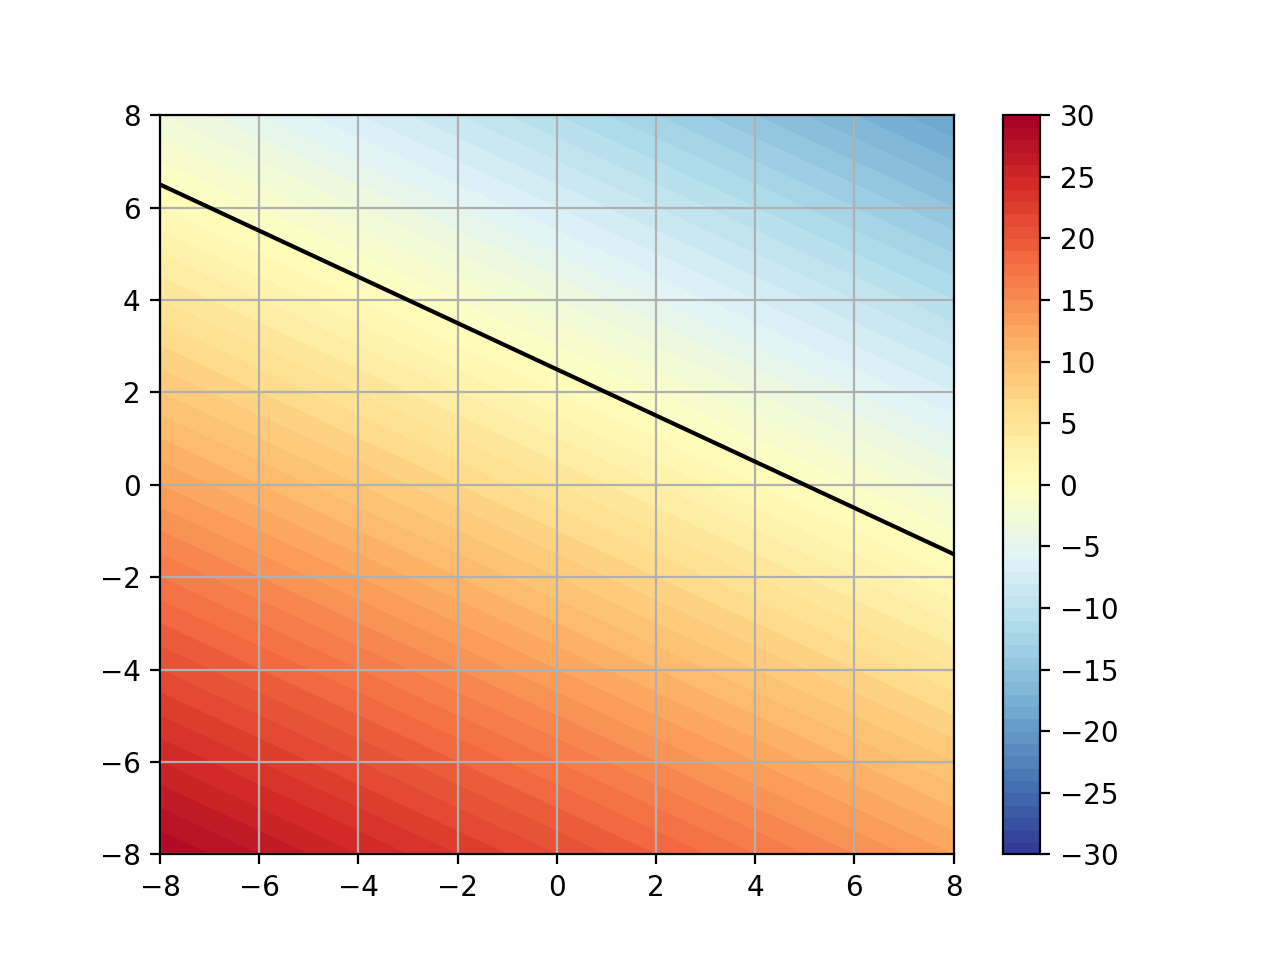

In [9]:
### Linear Plot

# plot the zero line
plt.plot(X1,zero_line, color='black')
# plot the heatmap 
# compute range of activity
max_activity1 = np.max([np.abs(np.min(activity1)),np.max(activity1)])
# round up max activity to nearest log10
base = np.floor(np.log10(max_activity1))
rounded_max = (10**base)*(np.ceil(max_activity1/10**base))

levels = np.arange(-rounded_max, rounded_max+0.1, 10**(base-1))
# ticks = np.arange(-rounded_max, rounded_max+0.1, 5*10**(base-1))
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(activity1, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
plt.colorbar(ticks=ticks)
#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [10]:
# Properties
# rotate the gradient lines by modifying the ratio -W[0]/[1] 
# Q? how does this translate to higher dimensions?
# increase the range by changing the absolute value of W[i]

<IPython.core.display.Javascript object>


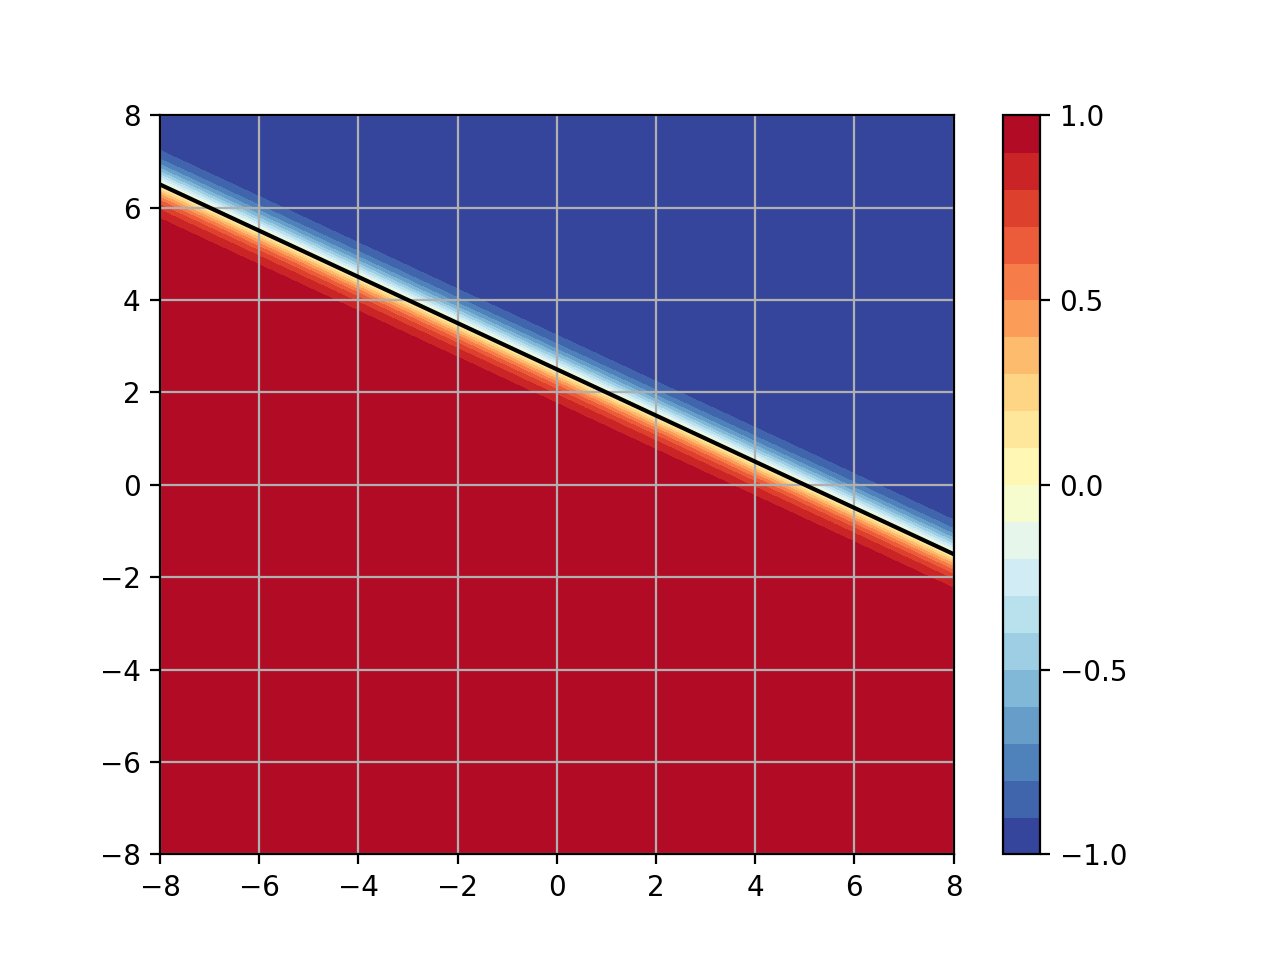

In [11]:
# activity post non-linearity 

activity2 = np.tanh(activity1)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# plot the heatmap 
levels = np.arange(-1,1.1, 0.1)
# extend level to be inclusive on last level
levels[-1]*=1.001
ticks = np.arange(-1,1.1,0.2)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(activity2, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
plt.colorbar(ticks=ticks)
#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

In [12]:
###  2 - gaussian heatmap

# combining circular gaussian with normal neuron
# neuron parameters (weights, bias)
W = [-1.0, -2.0]
# b = 0 # bias defined by by the center of radial function

# radial parameters
center = [1, 2.0] # controls the center of gaussian (<=> bias of neuron)
sig = 4.0 # controls the size of the gaussian
b = -np.matmul(W,center)
print(b)

5.0


In [13]:
# heatmap neuronal activity
n_activity = np.sum(W*inputs_heatmap, axis=1)+b
print(n_activity.shape)

# heatmap radial activity 

r_activity = np.exp((-1.0/sig**2) *  np.sum(np.square(inputs_heatmap-center), axis=1))
print(r_activity.shape)

# overall heatmap activity
activity3 = n_activity*r_activity

(25921,)
(25921,)


<IPython.core.display.Javascript object>


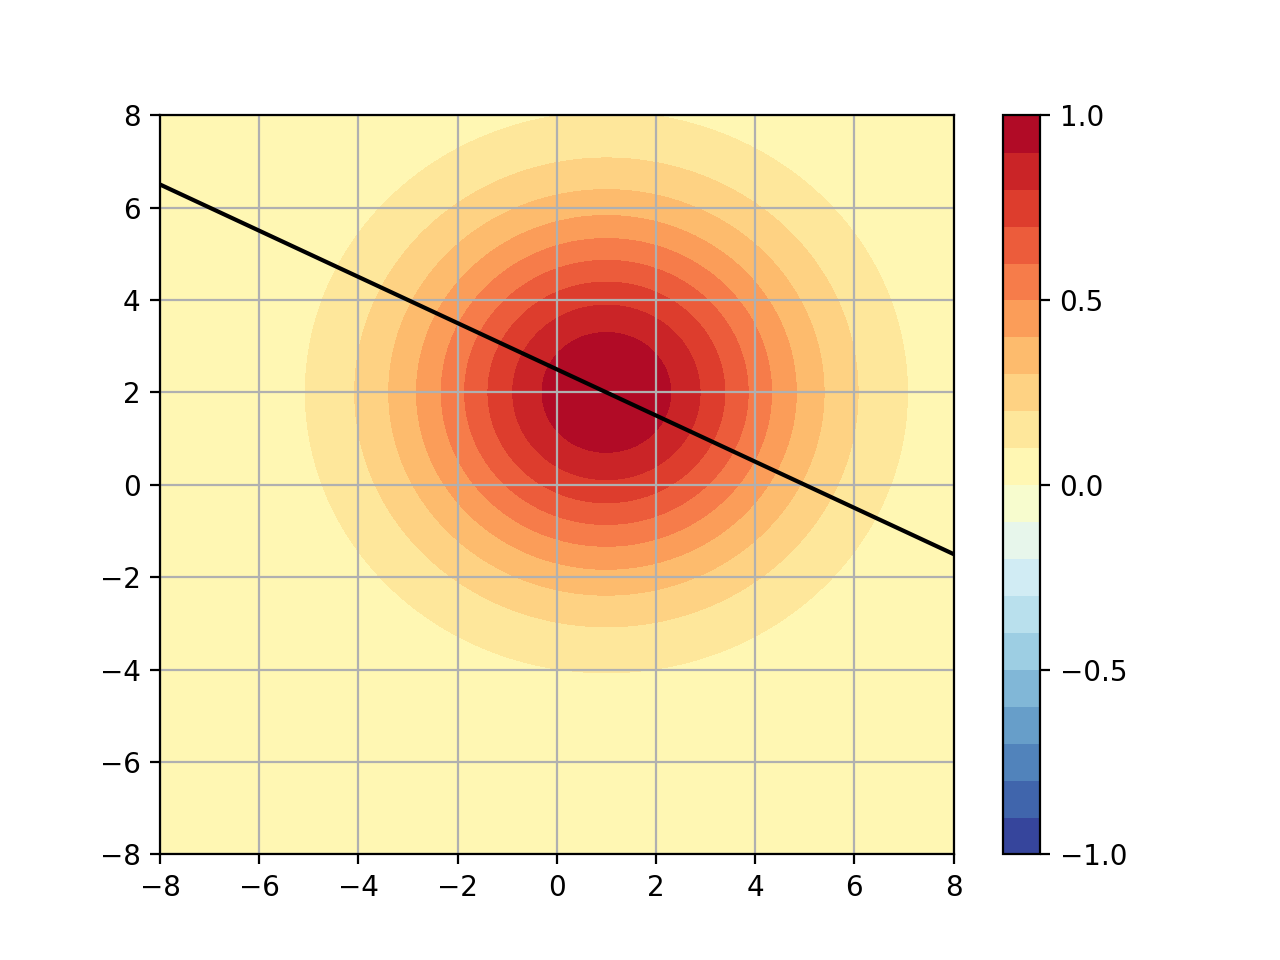

In [14]:
# plot the gaussian activity alone
# plot the zero line
plt.plot(X1,zero_line, color='black')

levels = np.arange(-1.0, 1.0+0.1, 0.1)
ticks = levels[::5]

plt.contourf(X1s, X2s, np.reshape(r_activity, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


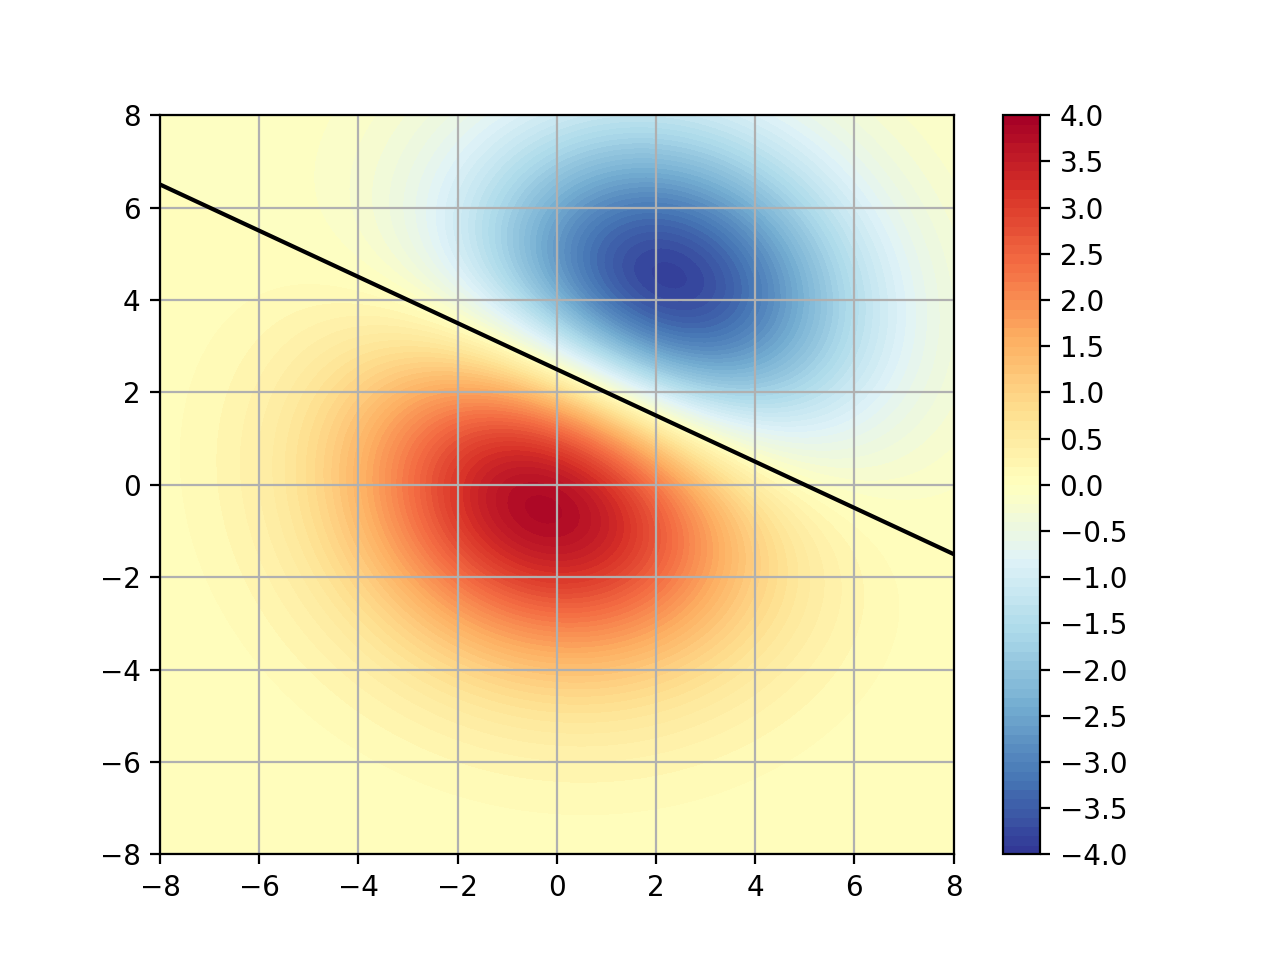

In [15]:
# plot the heatmap 

# plot the zero line
plt.plot(X1,zero_line, color='black')

levels = np.arange(-sig,sig+0.1,0.1)
ticks = np.arange(-sig,sig+1,0.5)

# plt.contourf(X1s, X2s, np.reshape(activity3, np.shape(X1s) ), np.arange(-1.0, 1.01, 1/100.0), cmap=cm.RdYlBu_r, vmin=0, vmax=peak_max)
plt.contourf(X1s, X2s, np.reshape(activity3, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
# plt.contourf(X1s, X2s, np.reshape(activity3, np.shape(X1s) ), cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)

#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


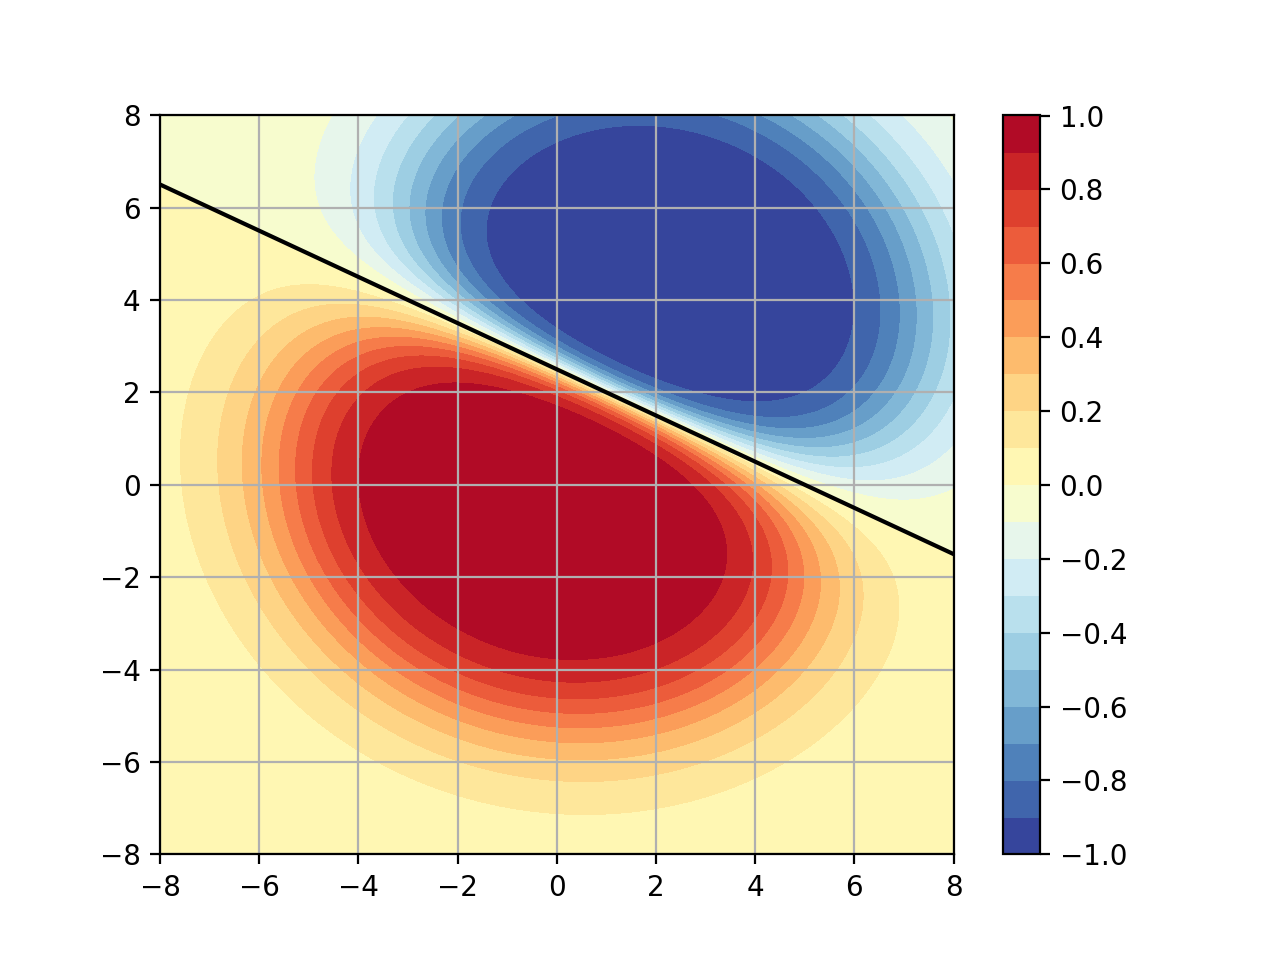

In [16]:
# Test: add tanh non-linearity to above activity 

activity4 = np.tanh(activity3)

# plot the zero line
plt.plot(X1,zero_line, color='black')
# plot the heatmap 
levels = np.arange(-1,1.1, 0.1)
# extend level to be inclusive on last level
levels[-1]*=1.001
ticks = np.arange(-1,1.1,0.2)

plt.contourf(X1s, X2s, np.reshape(activity4, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)
plt.colorbar(ticks=ticks)
#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()

<IPython.core.display.Javascript object>


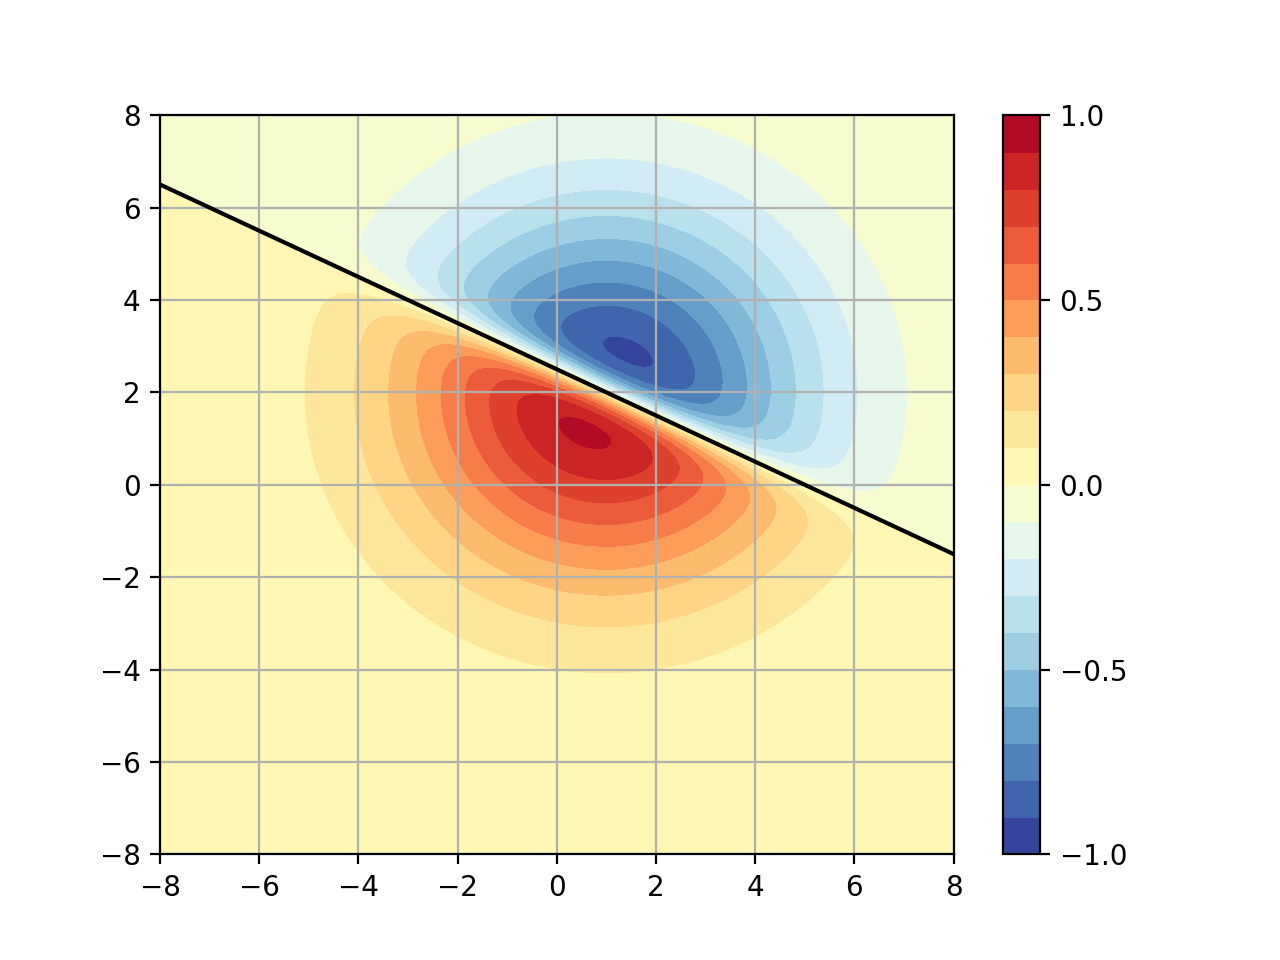

In [17]:
# TEST: activity of tanh(lin)*gaussian

activity5 = np.tanh(n_activity)*r_activity

# plot the zero line
plt.plot(X1,zero_line, color='black')
# plot the heatmap 
levels = np.arange(-1,1.1, 0.1)
# extend level to be inclusive on last level
levels[-1]*=1.001
ticks = levels[::5]


plt.contourf(X1s, X2s, np.reshape(activity5, np.shape(X1s) ), levels=levels, cmap=cm.RdYlBu_r)

plt.colorbar(ticks=ticks)
#reset axes
plt.axis([-8,8, -8, 8])
plt.grid(True)
plt.show()